# Apache log n-gram analysis

### Data Dictionary
Using additional analysis not shown earlier, I was able to come up with this data dictionary to describe the contents of the data file.

 | Column     | Description |
 |------------|:-----------:|
 | host       | The hostname or IP address making the request to the website |
 | logname    | not a populated field |
 | time       | integer version of unix timestamp |
 | method     | HTTP method for the call |
 | url        | path to the file being requested |
 | response   | HTTP response code for the call |
 | bytes      | Number of bytes returned for the request |
 | referer    | not a populated field |
 | useragent  | not a populated field |

---

### Prerequisites for Python Notebook
 - python 3.x
 - python packages
   - pip3 install pandas
   - pip3 install scikit-learn
   - pip3 install matplotlib
   - pip3 install networkx
 - jupyter notebook --debug > log.file 2>&1
 
### Sample data used for analysis
- http://indeedeng.github.io/imhotep/files/nasa_19950801.tsv (saved in 'rawData/nasa_19950801.tsv')
- http://indeedeng.github.io/imhotep/files/nasa_19950630.22-19950728.12.tsv.gz
- http://indeedeng.github.io/imhotep/files/nasa_19950731.22-19950831.22.tsv.gz

### Import necessary libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import hashlib 
import networkx as nx


### Read data file

In [13]:
apache_log_path = 'rawData/nasa_19950801.tsv'
apache_log_data = pd.read_csv(apache_log_path, sep='\t', header=0)

### Extract navigation path for most active user
This was found earlier to be 'edams.ksc.nasa.gov'. We've hard-coded that value here.

In [ ]:
visitor_address = apache_log_data.host
histogram_visitor_address = visitor_address.value_counts()
single_user_logs = apache_log_data.loc[apache_log_data['host'] == 'edams.ksc.nasa.gov']
single_user_path = single_user_logs['url']

### Create bi-gram of the single user's path for the purposes of generating a directed graph
We have our own home-grown function to create n-grams that needs a bit of work to be 100% accurate, but it will server our needs for now. The 'tuple' version is for graphing and the 'dataframe' version is to make it a bit easier to read in column form.

In [48]:
#should unwind this a bit to make the purpose more clear
#also, there should be padding added to the front/back to indicate beginning and ending of a path
def find_ngrams(input_list, n):
  return [list(x) for x in set(tuple(x) for x in list(zip(*[input_list[i:] for i in range(n)])))]

single_user_path_bi_gram_as_tuples = list(find_ngrams(single_user_path,2))
single_user_path_bi_gram_as_dataframe = pd.DataFrame.from_records(single_user_path_bi_gram_as_tuples, columns=labels)
print(single_user_path_bi_gram_as_dataframe)

                         vertex1                       vertex2
0    /images/WORLD-logosmall.gif                     /ksc.html
1      /images/USA-logosmall.gif   /images/WORLD-logosmall.gif
2    /images/WORLD-logosmall.gif                /htbin/wais.pl
3     /images/NASA-logosmall.gif    /images/ksclogo-medium.gif
4    /images/WORLD-logosmall.gif    /images/NASA-logosmall.gif
5                      /ksc.html    /images/ksclogo-medium.gif
6                      /ksc.html                     /ksc.html
7     /images/ksclogo-medium.gif                     /ksc.html
8                 /htbin/wais.pl                     /ksc.html
9     /images/ksclogo-medium.gif    /images/NASA-logosmall.gif
10                     /ksc.html    /images/NASA-logosmall.gif
11    /images/ksclogo-medium.gif  /images/MOSAIC-logosmall.gif
12                  /\\yahoo.com                     /ksc.html
13    /images/NASA-logosmall.gif  /images/MOSAIC-logosmall.gif
14  /images/MOSAIC-logosmall.gif     /images/USA-logosm

### Single User's Path Through the Site Converted to a Directed Graph
We take the bi-grams (in tuple form) and feed it into our graphing method.

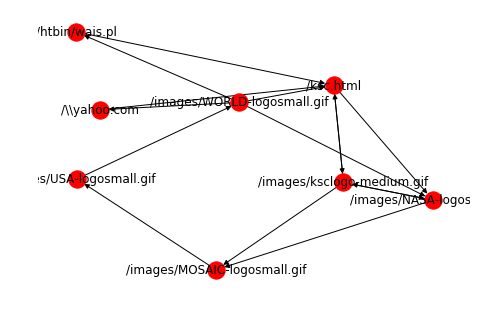

In [49]:
Graph = nx.DiGraph()
Graph.add_edges_from(single_user_path_bi_gram_as_tuples)
nx.draw(Graph, arrows=True, with_labels=True)